In [16]:
import numpy as np
import pandas as pd
import vega_datasets as vd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context('notebook')

In [17]:
df_diamonds = sns.load_dataset('diamonds')
df_titanic = sns.load_dataset('titanic')
df_gpm_lxp = vd.data('gapminder')
df_cars = vd.data('cars')
df_flights = vd.data('flights_5k')
df_taxis = sns.load_dataset('taxis')

<br>

# What is Machine Learning?
---

But first,

## What is Software?

- A set of instructions to a computer
- Simplest instruction: `if < condition > then < action > else < fallback >`

```python
if current_price < moving_average_50_days:
    signal = 'buy'
else:
    signal = 'hold'
```

## Before Machine Learning

- manually find **decision boundaries** and hard-code them

## What ML does

1. Gives programs the ability to **learn decision boundaries from data** and write programs without explicit human hard-coding
2. Enables programs to automatically extract knowledge from data, usually with the goal of **making predictions** on new, unseen data
3. Develops programs that automatically adjust (or *tune*) their performance from exposure to information (*learning*) 
    - This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning is a sub-field of Artificial Intelligence (AI).

## Further Reading

- A Visual Introduction to Machine Learning by [R2D3](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

<br>

<br>

## An example
---

### The task: <span style="font-weight: bold; color: green">build an News Classifier; to label news into human resources or not.</span>

- This is an example of a **Classifier**, 
    - takes Text (a news article) as input
    - produces a Boolean as output (True => news article is HR-related)

### One way to do this

- Let's look at the some articles in the news. They may not directly say if it is HR related,
    - but the news with job titles is more probable to be HR news
    - If there are company names, that is also a good signal. 
    - We could look at the verbs and other noun forms (hiring, resignation, letting go, laying off)
- We combine all these rules.
- Then, we use some heuristics to determine a threshold to "classify" the news article whether it is an HR or not.

#### Disadvantages

- Rule and heuristic based. Involves manual effort and domain expertise.
    - If we want to _improve_ the classifier, we introduce more rules.
- The rules are highly dependent on the developer. Biases and prejudices on the articles that you read will be the main driver.
- For a more complicated classification problem, you may not cover all of the rules.
- For a domain that you do not know much about, you need to first learn the domain, the article structure and what you need to use to build the rules

#### *Method 1 - Handcrafted Business Rules*

<br>

In [7]:
company_names = ['Google', 'Microsoft', 'Apple', 'Berkshire Hathaway']
job_titles = ['CFO', 'CEO', 'CTO', 'Director', 'Vice President']

In [8]:
SOME_THRESHOLD = 20

def hr_or_not(text='a news article which may or may not be about HR'):
    # Initialize
    confidence = 0
    label = 0
    
    # Look for HR related keywords
    if ('hire' in text) or ('hiring' in text) or ('join' in text) or ('joining' in text) or ('laying off' in text) or ('resign' in text):
        confidence += 10

    # Look for job titles
    for job_title in job_titles:
        if job_title in text:
            confidence += 10

    # Look for company names
    for company_name in company_names:
        if company_name in text:
            confidence += 10

    # Check if threshold has been cleared
    if confidence >= SOME_THRESHOLD:
        label = 1 
        
    if (label == 1):
        print(f"\n'{text}' -- is an HR article\n") 
    else: 
        print(f"\n'{text}' -- is not an HR article\n")    
                
    return None

In [9]:
text = 'Microsoft recently hired Satya Nadella CEO'
hr_or_not(text)


'Microsoft recently hired Satya Nadella CEO' -- is an HR article



In [10]:
hr_or_not("Tesla fires Elon Musk as CEO")


'Tesla fires Elon Musk as CEO' -- is not an HR article



In [11]:
hr_or_not('Bomb set off in a remote mountain location')


'Bomb set off in a remote mountain location' -- is not an HR article



In [12]:
hr_or_not('Google renames itself as Alphabet, hires new CEO')


'Google renames itself as Alphabet, hires new CEO' -- is an HR article



In [13]:
hr_or_not('Apple sees massive laying off')


'Apple sees massive laying off' -- is an HR article



In [14]:
hr_or_not("JD Vance, the US Vice President met with NVIDIA managers")


'JD Vance, the US Vice President met with NVIDIA managers' -- is not an HR article



## Method 2 - Classifying news articles with Machine Learning
---

<big>

1. Collect a large number (say 10_000) of news articles on different topics, including HR
2. Use a text classifier (an ML algorithm) to *train* itself
- It extracts all the words from the corpus
- Discovers associations between bags of words and the training categories
- For example, it may understand that words like 'mitochondria', 'viruses', 'microscope', 'gene sequencing' are more likely to be associated with the topic BIOLOGY than SPORTS
- Then, we give it text that it has not seen before
- Based on words and sequences of words, it will predict a category (with a degree of confidence)

<big>

<br>

# Fundamental ML Concepts
---

<big>

**1. AUTOMATED PARAMETER LEARNING**

- Central to machine learning is the concept of **making decision automatically** from data, **without the user specifying explicit rules** how this decision should be made.  

**2. GENERALIZATION**

- The goal of a machine learning algorithm is to predict on new, previously unseen data.
- We want to learn patterns from small samples of data and induce rules from it; then generalize over much larger datasets using that knowledge. 
- Typically, we need to make a trade-off between the flexibility and accuracy of the model (_the bias-variance tradeoff_).

<br>

### Types of ML Algorithms
---

**Supervised learning**

- Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and classification

**Unsupervised learning**

- Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

<br>

<br>

## Supervised Learning: Classification and Regression
---

<big>

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output. The task is to construct a model (or program) which is able to predict the desired output of an unseen object given the set of features. 

Supervised learning is further broken down into two categories, **classification** and **regression**. 

- In _classification_, the label is **discrete**
- In _regression_, the label is **continuous**

sklearn has algorithms that can do both

```python
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
```

> Though, from one point of view, the fact that continuous labels can be binned into categorical variables, one might argue that these tasks are interchangable.
And they are.

Another important thing to remember is that in supervised learning, there is always a distinction between 

- a **training set** for which the desired outcome is given, and 
- a **test set** for which the desired outcome needs to be inferred.

**Examples/Applications of Supervised Learning**

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy. (classification)
- given a photograph of a person, identify the person in the photo. (classification)
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like. (recommendation)
- given a persons age, education and position, infer their salary (regression)

<br>

## Unsupervised Learning: Clustering and friends
---

<big>

In **Unsupervised Learning** there is no desired output associated with the data. Instead, we are interested in extracting some form of knowledge or discover some sort of structure in the data.

> In a sense, you can think of unsupervised learning as a means of _discovering labels from the data_ itself. 

Unsupervised learning comprises tasks such as 
- *dimensionality reduction*, 
- *clustering*, and
- *density estimation*.

**Examples/Applications of Unsupervised Learning**

- given detailed observations of distant galaxies, determine which features or combinations of features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two
- given a large collection of news articles, find recurring topics inside these articles.
- given a collection of images, cluster similar images together (for example to group them when visualizing a collection)

<br>

## Training and Test Data
---

<big>

- Real world systems learn from the data they have (historical)
- As new data comes in (from customers, sensors, or other sources) the trained model must predict on fundamentally **unseen** data

We can **simulate** this phenomenon during training using a *train/test split*

> The test data is a simulation of "future data" which will come into the system during production.

- Data might sometimes be sorted, so simple splitting would lead us to has misrepresented proportions of classes in our splits.
- To get an accurate simulation of the real world, we shuffle our data then split it.

`scikit-learn` has a prebuilt function, `train_test_split()` to split data into training and testing for you. It works on the following syntax:

```python    
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7)
```
    
- By evaluating our model's performance on data that has been seen during training, we could get *false confidence* in the power of our system. 
- This might lead to putting a system into production which fails at predicting new data!

> As a rule of thumb, always evalute/report model performance on out-of-sample data.

Read: [Overfitting](http://www.wikiwand.com/en/Overfitting)

<br>

# Titanic Data for ML setup
---

<br>

In [18]:
df_titanic

# We want to predict whether someone survived or not

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [43]:
pd.get_dummies(df_titanic['who'], prefix='who').astype(int)

,who_child,who_man,who_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
886,0,1,0
887,0,0,1
888,0,0,1
889,0,1,0


In [21]:
y = df_titanic.loc[:, 'survived']

In [22]:
X = df_titanic.drop(columns='survived')

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
type(train_test_split(X, y, train_size=0.8))

list

In [25]:
len(train_test_split(X, y, train_size=0.8))

4

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

<br>

## The Student-Professor Analogy
---

<big>

- As an interesting analogy, consider the simple case of students appearing for an exam.
- You, the professor, have taught them their curriculum well and helped them solve many exercises in-class. (training)
- Now, you hope that these students will be able to take that knowledge and apply it to problems they've never seen before. (testing)
    - If you quiz them on the same questions they've solved before, their performance will be very good.
    - But only when they solve *unseen problems* accurately, can you safely conclude that they've learned their subject well.
- For this reason, you need to train them on a set of problems separate and distinct from the ones you will test them on
- The same is true for teaching computers on how to learn patterns

<br>

## Machine Learning in Python with `scikit-learn`
---

<big>

ML is about building models with **tunable parameters** that are adjusted automatically so as to improve their behavior by **adapting to training data.**

### `scikit-learn` basics

* Most machine learning algorithms implemented in scikit-learn expect data to be stored in a **two-dimensional array or matrix** 

* Scikit-learn strives to have a **uniform interface** across all methods  

* The size of the array is expected to be `[n_samples, n_features]`
    - **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
    - **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases

<br>

## `scikit-learn` Classes and Functions
---


<big>

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces:
- **estimator** interface for building and ﬁtting models, is at the core of the library. It,
    - deﬁnes instantiation mechanisms of objects and exposes a **.fit()** method for learning a model from training data. 
    - All supervised and unsupervised **learning algorithms** (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. 
    - Machine learning tasks like **feature extraction, feature selection or dimensionality reduction** are also provided as estimators.
- **predictor** interface for making predictions
- **transformer** interface for converting data.

<br>

Here's a list:

- Datasets for prototyping or learning
    - **`sklearn.datasets`**: Datasets


- Tools for structuring/streamlining your analysis
    - **`sklearn.pipeline`**: Pipeline


- Data Preparation for Machine Learning
    - **`sklearn.preprocessing`**: Preprocessing and Normalization
    - **`sklearn.feature_selection`**: Feature Selection
    - **`sklearn.feature_extraction`**: Feature Extraction


- ML Algorithms (selected list)
    - **`sklearn.cluster`**: Clustering
    - **`sklearn.linear_model`**: Generalized Linear Models
    - **`sklearn.multiclass`**: Multiclass classification
    - **`sklearn.svm`**: Support Vector Machines
    - **`sklearn.tree`**: Decision Trees
    - **`sklearn.naive_bayes`**: Naive Bayes
    - **`sklearn.neighbors`**: Nearest Neighbors
    - **`sklearn.neural_network`**: Neural network models


- Model Ensembling 
    - **`sklearn.ensemble`**: Ensemble Methods


- Performance Evaluation
    - **`sklearn.cross_validation`**: Cross Validation
    - **`sklearn.metrics`**: Metrics

<br>

**Datasets availabe with `scikit-learn`**

* **Available Data**: small datasets for quick prototyping, stored within sklearn (no need to download)
    * `sklearn.datasets.load_*`  
    

* **Downloadable Data:** larger datasets available for download, `scikit-learn` includes tools which streamline this process.
    * ``sklearn.datasets.fetch_*``
    
    
* **Generated Data:** there are several datasets which are generated from models based on a random seed.  These are available in 
    * ``sklearn.datasets.make_*``

## Example: Linear Regression

In [44]:
from sklearn.datasets import load_diabetes, make_classification, load_iris

In [45]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = pd.DataFrame(data=load_diabetes()['data'], columns=load_diabetes()['feature_names'])
y = pd.Series(load_diabetes()['target'], name='disease_progression')

In [49]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [50]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: disease_progression, dtype: float64

In [51]:
df = pd.concat([X, y], axis=1)

In [52]:
df.sample(10).round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
353,-0.053,-0.045,-0.056,-0.037,0.089,-0.003,0.008,0.034,0.132,0.003,109.0
18,-0.038,-0.045,-0.011,-0.037,-0.037,-0.019,-0.029,-0.003,-0.018,-0.018,97.0
263,-0.075,0.051,-0.077,-0.047,-0.047,-0.033,0.004,-0.039,-0.072,-0.018,116.0
162,-0.053,-0.045,0.030,-0.075,-0.024,-0.011,-0.003,-0.003,-0.031,-0.001,172.0
255,0.002,-0.045,-0.065,-0.006,-0.007,-0.019,0.041,-0.039,-0.003,0.007,153.0
392,-0.042,0.051,-0.030,-0.002,0.022,0.037,0.012,-0.003,-0.041,0.065,118.0
237,0.056,-0.045,-0.069,-0.069,-0.000,-0.001,0.045,-0.038,-0.048,-0.001,72.0
423,0.009,0.051,-0.040,0.029,0.038,0.074,-0.073,0.108,0.016,-0.047,91.0
121,0.064,-0.045,0.018,0.022,0.008,0.022,-0.036,0.034,0.020,0.011,173.0
278,0.067,0.051,-0.036,-0.085,-0.007,0.020,-0.054,0.034,0.001,0.032,102.0


<Axes: >

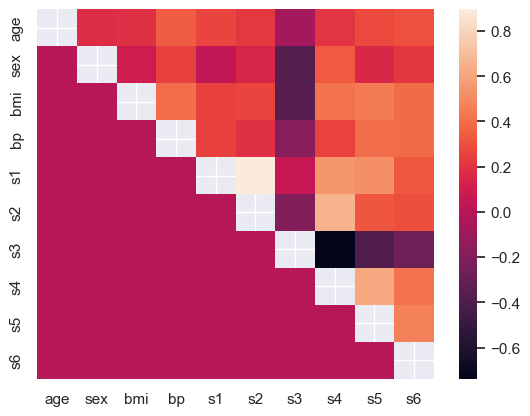

In [71]:
df_corr = df.drop(columns='disease_progression').corr()
sns.heatmap(data=pd.DataFrame(np.triu(df_corr.replace(1, np.nan).replace(0, np.nan)), index=df_corr.index, columns=df_corr.columns))

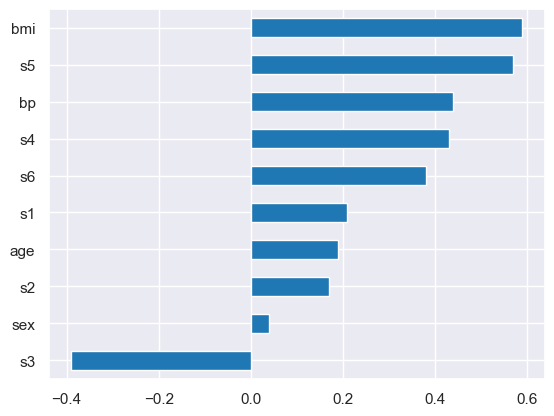

In [59]:
df.corr()['disease_progression'].drop('disease_progression').round(2).sort_values().plot.barh();

In [61]:
# Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=5489)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:

# Define the model object
lm_1 = LinearRegression()


In [74]:

# Train the model
lm_1.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:

# Check the coefficients
print(lm_1.coef_.round(2))
print(X_test.columns)

[  17.98 -230.87  582.37  276.48 -576.17  206.32   82.39  345.05  597.25
   75.15]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [94]:
# Check the intercept
lm_1.intercept_

np.float64(152.43217965478195)

In [73]:
pd.Series(data=lm_1.coef_, index=X.columns).round()

age     18.0
sex   -231.0
bmi    582.0
bp     276.0
s1    -576.0
s2     206.0
s3      82.0
s4     345.0
s5     597.0
s6      75.0
dtype: float64

<Axes: >

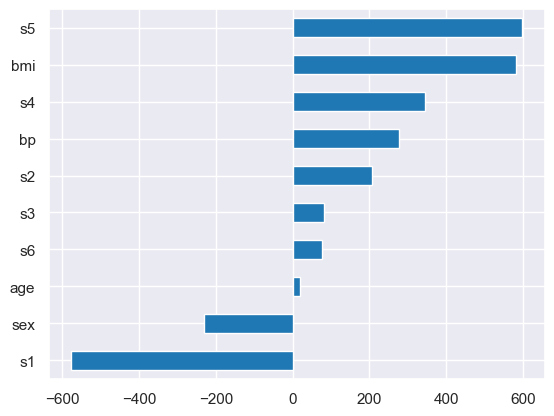

In [67]:
pd.Series(data=lm_1.coef_, index=X.columns).sort_values().plot.barh()

In [75]:

# Test the model
y_pred = lm_1.predict(X_test)


<Axes: xlabel='y_actual', ylabel='y_predicted'>

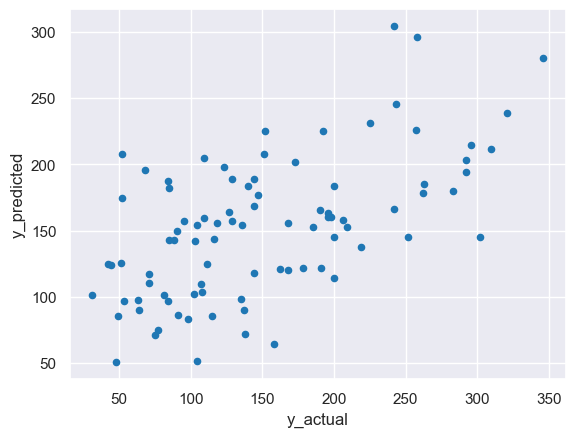

In [82]:
pd.concat([
    y_test.rename("y_actual"),
    pd.Series(data=y_pred, index=y_test.index, name='y_predicted')], axis=1).plot.scatter(x='y_actual', y='y_predicted')

In [83]:

residual = y_test - y_pred


In [84]:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)


3899.353865768817

In [85]:

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)


0.33680932911559913

In [89]:
errors = y_pred - y_test

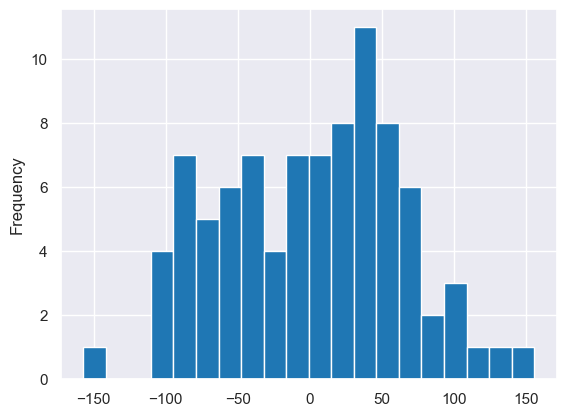

In [90]:
errors.plot.hist(bins=20);

<br>

## Using a Decision Tree
---

<br>

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
tree_1 = DecisionTreeRegressor(max_depth=4, )

In [104]:
tree_1.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [105]:
y_pred = tree_1.predict(X_test)

In [106]:
residuals = y_test - y_pred

<Axes: ylabel='Frequency'>

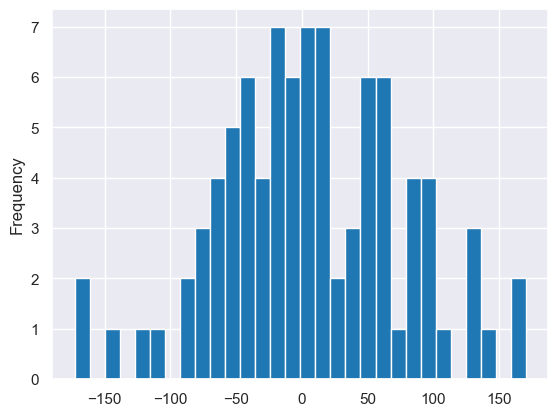

In [107]:
residuals.plot.hist(bins=30)

In [108]:
mean_squared_error(y_test, y_pred)

4953.964282368758

In [102]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

-0.24283325472414585

In [ ]:
# Simple Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Regularized Models
from sklearn.linear_model import Lasso, Ridge,  ElasticNet

In [ ]:
Lasso?

In [ ]:
# Using all defaults
lasso_0 = Lasso()

In [ ]:
# Not using defaults. Manually specify parameter values.
lasso_1 = Lasso(alpha = 0.9, tol = 0.001)

---

<br> 

# Iris Data
---

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.data.shape

In [ ]:
iris.feature_names

In [ ]:
df_iris = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names), 
                     pd.DataFrame(iris.target, columns=['Target'])], axis=1)
df_iris.head()

## The `scikit-learn` Estimator API
---

<big>

All models in scikit-learn have a very consistent interface.  We create an estimator object, defining required parameters, and then work with its methods.

**The `estimator` object**

- Every algorithm is exposed in scikit-learn via an `estimator` object. It is **instantiated** with the following syntax:

```python
from sklearn.<est_family> import <estimator>
est_obj = <estimator>(<parameters>)
```

- All the **parameters** of an estimator **are set** when it is instantiated. (suitable defaults are set already.)

```python
print(est_obj)
```        

- When the estimator is fit to the data, **parameters are estimated** from the data at hand. 

```python
est_obj.fit(training data, training labels, parameters)
```

- All the estimated parameters are attributes of the estimator object. An underscore at the end indicates a fit parameter

```python
print(est_obj.coef_)
print(est_obj.intercept_)
```

<br> 

### `estimator` object _methods_
---

<big>

- Available in **all Estimators**
    - **`model.fit()`** : fit training data. 
        - For **supervised** learning applications, this accepts **two arguments**: the data `X` and the labels `y` 
            - e.g. `model.fit(X_train, y_train)`
        - For **unsupervised** learning applications, this accepts only a **single argument**,
    the data `X` 
            - e.g. `model.fit(X_train)`


- Available in **supervised estimators**
  + **`model.predict()`** : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_test)`),
    and returns the learned label for each object in the array.
  + **`model.predict_proba()`** : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + **`model.score()`** : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.


- Available in **unsupervised estimators**
  + **`model.predict()`** : predict labels in clustering algorithms.
  + **`model.transform()`** : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + **`model.fit_transform()`** : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

<br>

# Machine Learning Cheat Sheet
---

<br>

<img src="https://user-images.githubusercontent.com/71872551/146676581-38d6d9a9-bc67-4257-9639-c4406d5c280a.png" width="1600" height="1200">

<br>

# Classification Algorithms
---

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png" width=1600 height=1200></img>